# Descenso de gradiente - Miguel González Cobaleda

## Objetivo
El objetivo será encontrar la función que mejor ajuste a la nube de datos y por tanto minimice el error, para llevar a cabo este estudio se va a realizar el descenso de gradiente para encontrar el error mínimo de esta función.

## Carga de librerías

In [15]:
import pandas as pd    # Carga de las librerias
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Lectura de los datos

Los datos consisten en una serie de notas en exámenes, diferenciando entre hombres y mujeres

In [2]:
data = pd.read_csv('../data/4_1_data.csv') # carga de datos

## Visualización y analisis de variables

In [3]:
data.head()

,score-1,score-2,label
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [4]:
data.tail()

,score-1,score-2,label
95,83.489163,48.380286,1
96,42.261701,87.103851,1
97,99.315009,68.775409,1
98,55.340018,64.931938,1
99,74.775893,89.529813,1


In [5]:
data.shape # 100 filas y 3 columnas

(100, 3)

In [6]:
data.isnull().sum() # observamos que no existen observaciones nulas en linguna columna

score-1    0
score-2    0
label      0
dtype: int64

In [7]:
x = data.iloc[:,[0,1]] # seleccionamos mediante iloc todas las filas de las columnas score-1 y score-2 y las guardamos en el objeto 'x'
y = data.iloc[:,2]    # seleccionamos mediante iloc todas las filas de la columna label y las guardamos en el objeto 'y'
scores = data.iloc[:,[0,1]].values # agrupamos las dos primeras columnas en forma de array y las guardamos en el objeto 'scores'
label = data.iloc[:,2].values # agrupamos la última columna en forma de array y la guardamos en el objeto 'label'

## Clasificación binaria
Creamos el gráfico de la nube de puntos, a su vez creamos dos objetos 'passed' si tiene valor en la columna label de 1 y 'failed' si tiene valor en la columna label de 0

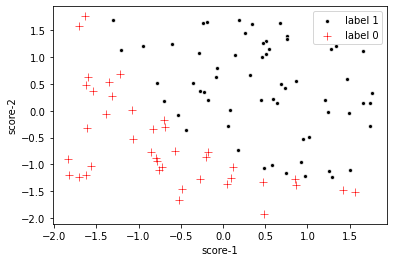

In [30]:
passed = (label == 1).reshape(100, 1) 
failed = (label == 0).reshape(100, 1)

ax = sns.scatterplot(x = scores[passed[:, 0], 0],
                     y = scores[passed[:, 0], 1],
                     marker = ".",
                     color = "black",
                     s = 60)
sns.scatterplot(x = scores[failed[:, 0], 0],
                y = scores[failed[:, 0], 1],
                marker = '+',
                color = "red",
                s = 60)
ax.set(xlabel="score-1", ylabel="score-2")
ax.legend(["label 1", "label 0"])
plt.show();

## Creación de las funciones

### Función logistica
Tendrá pendiente ascendente, también se puede llamar sigmoide

In [8]:
def logistic_function(x):    
    return 1/ (1 + np.exp(-x)) # creación de la funcion logistica, también llamada sigmoide.

### Función de coste
Se crea la función de coste, el objetivo será ir minimizando el error hasta que llegue un punto en el que por más iteraciones que llevemos a cabo, la minimización del error sea imperceptible.
Sigue la siguiente fórmula:

$ȷ(w,b)=1n∑n1ℓ(yiy^i)=−1n∑n1((yilog(y^i)+(yi+1)log(1−y^i))$

In [9]:
def compute_cost(theta, x, y): # creacion de la función de costes, está basada en el error, es decir, la diferencia entre el valor real y la prediccion
    m = len(y)
    y_pred = logistic_function(np.dot(x , theta))
    error = (y * np.log(y_pred)) + ((1 - y) * np.log(1 - y_pred))
    cost = -1 / m * sum(error)
    gradient = 1 / m * np.dot(x.transpose(), (y_pred - y))
    return cost[0] , gradient

Cálculo del coste y de la gradiente al principio

In [10]:
mean_scores = np.mean(scores, axis=0)
std_scores = np.std(scores, axis=0)
scores = (scores - mean_scores) / std_scores 

rows = scores.shape[0]
cols = scores.shape[1]

X = np.append(np.ones((rows, 1)), scores, axis=1) 
y = label.reshape(rows, 1)

theta_init = np.zeros((cols + 1, 1))
cost, gradient = compute_cost(theta_init, X, y)

print("Coste al inicio:", cost)
print("Gradiente al inicio:", gradient)


Coste al inicio: 0.693147180559946
Gradiente al inicio: [[-0.1       ]
 [-0.28122914]
 [-0.25098615]]


## Función de gradiente
Para encontrar el minimo, se utliza el descenso de gradiente, que se vale de derivadas para encontrar el mínimo.
Será esencial indicarle el alpha o tasa de aprendizaje y el número de iteraciones, en nuestro caso elegimos un alpha de 0.8 y 1500 iteraciones

In [11]:
def gradient_descent(x, y, theta, alpha, iterations): # Creamos la funcion de gradiente, en esta funcion incluimos entre otras cosas el alpha o learning rate que estara entre 0 y 1; y el nuemro de iteracciones o 'pasos'                                                    
    costs = []
    for i in range(iterations):
        cost, gradient = compute_cost(theta, x, y)
        theta -= (alpha * gradient)
        costs.append(cost)
    return theta, costs
theta, costs = gradient_descent(X, y, theta_init, 0.8, 1500) # aqui es donde le indicamos la tasa de aprendizaje y el numero de iteraciones

print("Theta después del descenso de gradiente:", theta)
print("Resultado de coste:", costs[-1])

Theta después del descenso de gradiente: [[1.71790302]
 [3.99162072]
 [3.72400735]]
Resultado de coste: 0.2034977101767841


## Gráfico de las iteraciones
Según observamos en el gráfico, las primeras iteraciones descendian el error de forma abultada, pero cuando el error va tendiendo hacia el mínimo el descenso empieza a ser menor hasta encontrarse en un punto en el cual aunque haga más iteraciónes, la mejora será mínima.

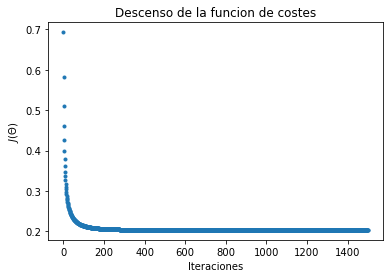

In [12]:
plt.plot(costs,'.') # representamos la funcion de coste o error, en la que como se puede observar tiende hacia un minimo
plt.xlabel("Iteraciones")
plt.ylabel("$J(\Theta)$")
plt.title("Descenso de la función de costes");

## Creación frontera de decisión
Lo que hacemos es definir el gráfico de la nube de puntos del principio y después creamos una linea generada con los datos obtenidos del descenso de gradiente.
Como podemos ver la linea ajusta bastante bien.

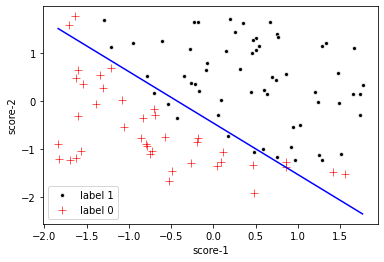

In [32]:
sns.scatterplot(x = X[passed[:, 0], 1],
                y = X[passed[:, 0], 2],
                marker = ".",
                color = "black",
                s = 60)
ax = sns.scatterplot(x = X[failed[:, 0], 1],
                    y = X[failed[:, 0], 2],
                    marker = "+",
                    color = "red",
                    s = 60)

ax.legend(["label 1", "label 0"])
ax.set(xlabel="score-1", ylabel="score-2")


x_boundary = np.array([np.min(X[:, 1]), np.max(X[:, 1])])
y_boundary = -(theta[0] + theta[1] * x_boundary) / theta[2]

sns.lineplot(x = x_boundary, y = y_boundary, color="blue")
plt.show();